In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

# openCV는 BGR로 matplotlib는 RGB로 이미지 표시

# OPEN CV

* Numpy 모듈이 파이썬 3.0 ~ 3.3까지의 버전을 지원하지 않아 파이썬 3.4버전 이상이 필요
* 설치 명령어 : 
    - pip install opencv-python / pip3 install opencv-python  
    - pip3 install opencv-contrib-python (엑스트라 모듈 포함) 

## 이미지, 비디오 입출력

1. img = cv2.imread(file_name [, mode_flag]) : 파일으로부터 이미지 읽기 
    * file_name : 이미지경로, 문자열 
    * mode_flag = cv2.IMREAD_COLOR : 읽기모드지정
        * cv2.IMREAD_COLOR : **컬러(BGR)스케일**로 읽기, 기본 값 
        * cv2.IMREAD_UNCHANGED : 파일 그대로 읽기(alpha channel 등등 전부 포함) 
        * cv2.IMREAD_GRAYSCALE : 그레이 스케일로 읽기


2. cv2.waitKey(time)
    * time : 입력 대기 시간 (무한대기 : 0) 
    * 사용자가 어떤키를 입력했을 때 대기하며 입력했을 때 Ascii Code(esc:27) 반환

3. cv2.destoryAllWindow() : 화면의 모든 윈도우를 닫는 함수 


### 새창에 이미지 띄우기

In [3]:
img_file = 'img/actor.jpg'
img = cv2.imread(img_file)

cv2.imshow('IMG', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
print(f'{img.shape}, {img.size} ')

(930, 749, 3), 2089710


  |     &nbsp;                            |  &nbsp;                      |
  | ------------------------------------- | ---------------------------- |
  | 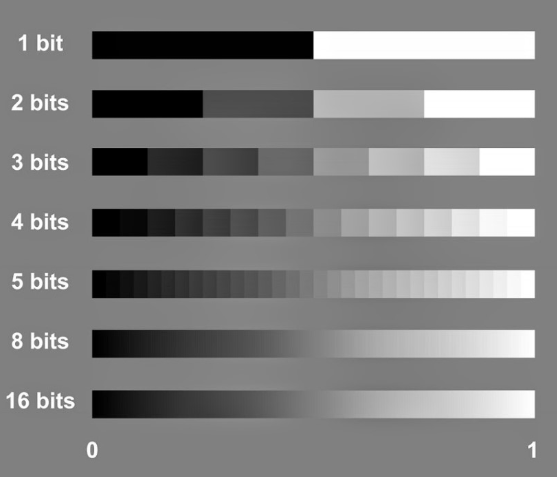|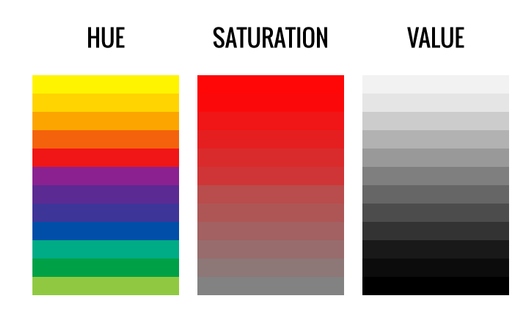|



image depth는 각 pixel을 이루는 color element(e.g. RGB, BGR)같은 것들이 몇 bit로 이루어져 있는가를 나타내는 것
일반적으로 8bit를 사용한다. 즉, RGB는 일반적으로 각각 0~255 (2^8)로 표현된다.

HSV : Hue(색상 i.e. 각 색을 구별하는 고유한 속성), Saturation(채도 i.e. 어느 한 색상의 순수하고 선명한 정도), Value(명도 i.e. 어느 색상의 밝고 어두운 정도)

### jupyter notebook에 이미지 바로 나타내기

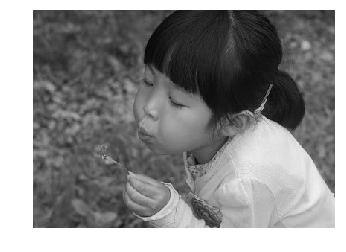

In [3]:
img = cv2.imread("img/girl.jpg")
plt.axis('off') #axis 출력 끄기 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 그레이스케일로 읽기

In [6]:
img2 = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
cv2.imshow('IMG', img2)
cv2.waitKey()
cv2.destroyAllWindows()

### 이미지 저장하기 

* cv2.imwrite(file_path, img): 이미지를 파일에 저장 
    * file_path : 저장할 파일 경로 이름, 문자열 
    * img : 저장할 영상, Numpy 배열 

경로에 파일로 저장 

In [17]:
img_file = 'img/image.jpg'
img3 = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
cv2.imwrite('img/girl_gray.jpg', img3)

cv2.imshow(img_file, img3)
cv2.waitKey()
cv2.destroyAllWindows()

### 예제) 
(1) 컬러이미지를 윈도우 이미지로 연다. 

(2) 저장한다. , 아무키나 누르면 닫힌다. 

(3) 흑백사진으로 연댜, 아무키나 누르면 닫힌다.

In [29]:
prac_img = 'img/mountain.jpg'
img4 = cv2.imread(prac_img, cv2.IMREAD_ANYDEPTH)
cv2.imwrite('img/mt_Reduced.jpg', img4)

cv2.imshow(prac_img, img4)
cv2.waitKey()
cv2.destroyAllWindows()

### 동영상 및 카메라 프레임 읽기
* cap = cv2.VideoCaputure(file_path 또는 index) : 비디오 갭처 객체 생성
    * file_path : 동영상 파일 경로 
    * index : 카메라 장치 번호 (0 부터 차례로 증가)
    * cap : VideoCapture 객체 
* ret = cap.isOpend() : 객체 초기화 확인 
    * ret : 초기화 여부, True/False
* ret, img = cap.read() : 영상 프레임 읽기
    * ret : 프레임 읽기 성송 또는 실패 여부, True / False
    * img : 프레임 이미지, Numpy 배열 또는 None
* cap.set(id, value) : 프로퍼티 변경
* cap.get(id) : 프로퍼티 확인 
* cap.release() : 객체 자원 반납 

### 동영상 파일 읽기
* waitKey(value) : value 값 변경해보기

In [4]:
video_file = "img/big_buck.avi" # 동영상 파일 경로

cap = cv2.VideoCapture(video_file) # 동영상 캡쳐 객체 생성  ---①
if cap.isOpened():                 # 캡쳐 객체 초기화 확인
    while True:
        ret, img = cap.read()      # 다음 프레임 읽기      --- ②
        if ret:                     # 프레임 읽기 정상
            cv2.imshow(video_file, img) # 화면에 표시  --- ③
            cv2.waitKey(25)            # 25ms 지연(40fps로 가정)   --- ④
        else:                       # 다음 프레임 읽을 수 없슴,
            break                   # 재생 완료
else:
    print("can't open video.")      # 캡쳐 객체 초기화 실패
cap.release()                       # 캡쳐 자원 반납
cv2.destroyAllWindows()

#### 카메라 프레임 읽기(실습x, 웹캠필요)
* 촬영한 프레임을 읽어 화면에 표시한다.
* 아무 키 입력 시 중지

In [1]:
cap = cv2.VideoCapture(0)               # 0번 카메라 장치 연결 ---①
if cap.isOpened():                      # 캡쳐 객체 연결 확인
    while True:
        ret, img = cap.read()           # 다음 프레임 읽기
        if ret:
            cv2.imshow('camera', img)   # 다음 프레임 이미지 표시
            if cv2.waitKey(1) != -1:    # 1ms 동안 키 입력 대기 ---②
                break                   # 아무 키라도 입력이 있으면 중지
        else:
            print('no frame')
            break
else:
    print("can't open camera.")

cap.release()                           # 자원 반납
cv2.destroyAllWindows()

can't open camera.


#### 프레임 스트림 프로퍼티 얻기
* cv2.CAP_PROP_FRAME_WIDTH : 프레임 폭
* cv2.CAP_PROP_FRAME_HEIGHT : 프레임 높이
* cv2.CAP_PROP_FPS : 프레임 초당 프레임 수 
* cv2.CAP_PROP_POS_MSEC : 동영상 파일의 프레임 위치(MS)
* cv2.CAP_PROP_POS_AVI_RATIO : 동영상 파일의 상대 위치 (0:시작 , 1:끝)


In [6]:
def print_capture_properties(*args):
    capture = cv2.VideoCapture(*args)
    print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))
    
print_capture_properties("img/big_buck.avi")

Frame count: 558
Frame width: 852
Frame height: 480
Frame rate: 24.0


### 프레임 스트림을 비디오로 저장(실습x_웹캠필요)

In [11]:
capture = cv2.VideoCapture(0)
frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Frame width:', frame_width)
print('Frame height:', frame_height)

video = cv2.VideoWriter('data/captured_video.avi', cv2.VideoWriter_fourcc(*'X264'),
                        25, (frame_width, frame_height))

while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
        
    video.write(frame)
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break            

capture.release()
video.release()
cv2.destroyAllWindows()

Frame width: 640
Frame height: 480
Pressed Esc


### 비디오 파일의 프레임 간 이동
* cap.set(id, value) : 프로퍼티 변경
* cap.get(id) : 프로퍼티 확인 
* cv2.CAP_PROP_POS_FRAMES : 현재프레임의 개수

In [ ]:
capture = cv2.VideoCapture('img/big_buck.avi')
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

#첫번째 프레임을 가져온다. 
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
cature, frame = capture.read()
cv2.imshow('frame0', frame)

# 100번째 프레임으로 이동한다. 
capture.set(cv2.CAP_PROP_POS_FRAMES, 100)
print('Position:', int(capture.get(cv2.CAP_PROP_POS_FRAMES)))
cature, frame = capture.read()
cv2.imshow('frame100', frame)
    
cv2.waitKey()
cv2.destroyAllWindows()

Frame count: 558
Position: 0
Position: 100


### 카메라로 사진 찍기 (웹캠필요)
* 카메라 프레임 읽기 
* 아무 키 누르면 'photo.jpg'에 저장

In [13]:
cap = cv2.VideoCapture(0)                       # 0번 카메라 연결
if cap.isOpened() :
    while True:
        ret, frame = cap.read()                 # 카메라 프레임 읽기
        if ret:
            cv2.imshow('camera',frame)          # 프레임 화면에 표시
            if cv2.waitKey(1) != -1:            # 아무 키나 누르면
                cv2.imwrite('photo.jpg', frame) # 프레임을 'photo.jpg'에 저장
                break
        else:
            print('no frame!')
            break
else:
    print('no camera!')
cap.release()
cv2.destroyAllWindows()

### 카메라 녹화하기(웹켐필요)
    * 레코드 파일 저장하기
* writer = cv2.VideoWriter(file_path, fourcc, fps, (width, height)) : 비디오 저장 클래스 생성자 함수
    - file_path : 비디오 파일 저장 경로
    - fourcc : 비디오 인코딩 형싱 4글자
    - fps : 초당 프레임 수 
    - (width, height) : 프레임 폭과 프레임 높이 
    - writer : 생성된 비디오 저장 객체 
* writer.writh(frame) : 프레임 저장 
    - frame : 저장할 프레임 
* writer.set(id, value) : 프로퍼티 변경
* writer.get(id) : 프로퍼티 확인 
* ret = writer.fourcc(c1, c2, c3, c4) : fourcc코드 생성
    - c1, c2, c3, c4 : 인코딩 형식
    - ret : fourcc 코드
* cv2.VideoWriter_fourcc(c1, c2, c3, c4) : cv.VideoWriter.fourcc()

In [26]:
cap = cv2.VideoCapture(0)    # 0번 카메라 연결
if cap.isOpened:
    file_path = 'record.avi'    # 저장할 파일 경로 이름 ---①
    fps = 30.0                     # FPS, 초당 프레임 수
    fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 인코딩 포맷 문자
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))                        # 프레임 크기
    out = cv2.VideoWriter(file_path, fourcc, fps, size) # VideoWriter 객체 생성
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('camera-recording',frame)
            out.write(frame)                        # 파일 저장
            if cv2.waitKey(int(1000/fps)) != -1: 
                break
        else:
            print("no frame!")
            break
    out.release()                                   # 파일 닫기
else:
    print("can't open camera!")
cap.release()
cv2.destroyAllWindows()

## 그림그리기

### 직선그리기
* cv2.line(img, start, end, color[, thickness, lineType]):
    * img : 그림그릴 대상 이미지, Numpy 배열 
    * start : 선 시작 지점 좌표 (x,y) 
    * end : 선 끝 지점 좌표 (x,y)
    * color : 선 색상 ,(BGR), (0 ~ 255)
    * thickness=1 : 선 두께
    * lineType: 선그리기 형식 
        * cv2.LINE_4,LINE_8, LINE_AA 

#### 간단한 선그려보기

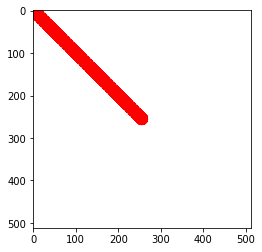

In [36]:
#512행, 512열, 3채널 , 255 값을 가지는 numpy 행렬 만들기 
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.line(image, (0,0), (255, 255), (255, 0 ,0),30,cv2.LINE_AA )

plt.imshow(image)
plt.show()

### 사각형 그리기 

* cv2.rectangle(img, start, end, color[, thickness, lineType]: 사각형 그리기 
    * img : 그림 그릴 대상 이미지, NumPy 배열
    * start : d사각형 시작 꼭짓점 (x,y)
    * end : 사각형 끝 꼭짓점( x, y)
    * color : 색상 (BGR)
    * thickness : 선 두께 
        * -1 : 채우기 
    * lineType : 선타입, cv2.line()과 동일 

#### 간단한 사각형 그리기

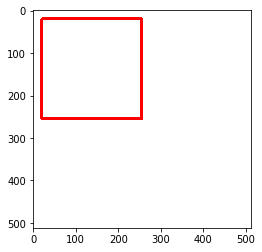

In [5]:
image = np.full((512, 512, 3), 255, np.uint8)

image = cv2.rectangle(image, (20,20), (255, 255), (255, 0, 0), 5) 
#image = cv2.rectangle(image, (20,20), (255, 255), (255, 0, 0), -1) 


plt.imshow(image)
plt.show()

#### 간단한사각형그리기_2

In [12]:
img = cv2.imread('img/blank_500.jpg')

# 좌상, 우하 좌표로 사각형 그리기
cv2.rectangle(img, (50, 50), (150, 150), (255,0,0) )        
# 우하, 좌상 좌표로 사각형 그리기
cv2.rectangle(img, (300, 300), (100, 100), (0,255,0), 10 )  
# 우상, 좌하 좌표로 사각형 채워 그리기 ---①
cv2.rectangle(img, (450, 200), (200, 450), (0,0,255), -1 )  

cv2.imshow('rectangle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 다각형 그리기

* cv2.polylines(img, points, isClosed, color[, thickness, lineType]): 다각형 그리기 

    *img : 그림 그릴 대상 이미지 
    * points : 꼭짓점 좌표, Numpy 배열 리스트 
    * isClosed: 닫힌 도형 여부, True/False 
    * color : 색상(BGR)
    * thickness : 선 두께
    * lineType : 선 타입, cv2.line()과 동일

#### 다각형그리기_1

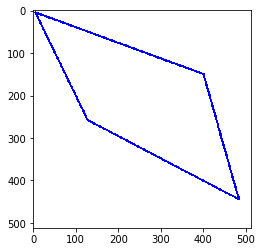

In [14]:
image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[5, 5], [128, 258] , [483, 444], [400, 150]])
image = cv2.polylines(image, [points], True, (0, 0, 255), 4)

plt.imshow(image)
plt.show()

#### 다각형그리기_2

In [26]:
img = cv2.imread('img/blank_500.jpg')

# Numpy array로 좌표 생성 ---②
# 번개 모양 선 좌표
pts1 = np.array([[50,50], [150,150], [100,140],[200,240]], dtype=np.int32) 
# 삼각형 좌표
pts2 = np.array([[350,50], [250,200], [450,200]], dtype=np.int32) 
# 삼각형 좌표
pts3 = np.array([[150,300], [50,450], [250,450]], dtype=np.int32) 
# 5각형 좌표
pts4 = np.array([[350,250], [450,350], [400,450], [300,450], [250,350]],dtype=np.int32) 

# 다각형 그리기 ---③
cv2.polylines(img, [pts1], False, (255,0,0))       # 번개 모양 선 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10)     # 3각형 열린 선 그리기 ---④
cv2.polylines(img, [pts3], True, (0,0,255), 10)    # 3각형 닫힌 도형 그리기 ---⑤
cv2.polylines(img, [pts4], True, (0,0,0))          # 5각형 닫힌 도형 그리기

cv2.imshow('polyline', img)
ret = cv2.waitKey(2000)
cv2.destroyAllWindows()
print(f'pressed key is {ret}')


pressed key is -1


### 원그리기

* cv2.circle(img, center, radius, color[, thickness, lineType]) : 원 그리기
    * img : 그림 대상 이미지
    * center : 원점 좌표 (x,y)
    * radius : 원의 반지름 
    * color : 색상 (BGR)
    * thickness : 선 두께 (-1 : 채우기)
    * lineType : 선 타입, cv2.line()과 동일

#### 간단한 원 그리기

<function matplotlib.pyplot.show(*args, **kw)>

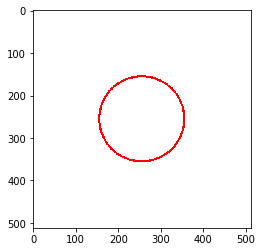

In [27]:
image = np.full((512, 512, 3), 255, np.uint8)

image = cv2.circle(image, (255,255),100, (255, 0, 0), 3) 
# image = cv2.circle(image, (255,255),100, (255, 0, 0), -1)

plt.imshow(image)
plt.show

### 텍스트 
* cv2.putText(image, text, position, font_type, font_scale, color) : 하나의 텍스트를 그리는 함수 
     - position : 텍스트가 출력될 위치 
     - font_type : 글씨체 
     - font_scale: 글씨 크기 가중치

In [28]:
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'Hello World', (0, 200), cv2.FONT_ITALIC, 2, (255, 0, 0))

cv2.imshow('text', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 창관리
* cv2.nameWindow(title [, option]) : 이름을 갖는 창 열기 
    * title : 창이름, 제목 줄에 표시
    * option : 창옵션 
        * cv2.WINDOW_NORMAL:임의의크기, 창 크기 조정 가능 
        * cv2.WINDOW_AUTOSIZE : 이미지와 같은 크기, 창 크기 재조정 불가능 
            
* cv2.moveWindow(title, x좌표 , y좌표) : 창위치 이동 
* cv2.resizeWindow(title, width, height) : 창 크기 변경 
* cv2.destroyWindow(title) : 창 닫기 
* cv2.destroyAllWindows(): 열린 모든 창 닫기

In [24]:
file_path = 'img/girl.jpg'
img = cv2.imread(file_path)                            # 이미지를 기본 값으로 읽기
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기

cv2.namedWindow('origin')                               # origin 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL)              # gray 이름으로 창 생성
cv2.imshow('origin', img)                               # origin 창에 이미지 표시
cv2.imshow('gray', img_gray)                            # gray 창에 이미지 표시

cv2.moveWindow('origin', 0, 0)                          # 창 위치 변경
cv2.moveWindow('gray', 100, 100)                        # 창 위치 변경

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.resizeWindow('origin', 200, 200)                    # 창 크기 변경 (변경 안됨)
cv2.resizeWindow('gray', 100, 100)                      # 창 크기 변경 (변경 됨))

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyWindow("gray")                               # gray 창 닫기

cv2.waitKey(0)                                          # 아무키나 누르면
cv2.destroyAllWindows()                                 # 모든 창 닫기

### 사용자의 키보드입력 처리하기
* 윈도우 wasd 키로 상하좌우 움직이기 
* q, esc누르면 종료

* cv2.waitKey(delay) :   
밀리초(0.001초) 단위로 숫자를 전달하면 해당 시간 동안 프로그램을 멈추고 대기하다가 키보드의 눌린 키에 대응하는 코드 값을 정수로 반환
    - 0 : 무한대
    - ex) esc를 누를 경우 27 출력 (ASCII코드 출력)
* ord() : 문자의 아스키코드 출력

In [39]:
img_file = "img/actor.jpg"
img = cv2.imread(img_file)
title = 'IMG'  # Windows title
x, y = 100, 100 # Initial Coordinates

while True:
    cv2.imshow(title, img)
    cv2.moveWindow(title, x , y)
    key = cv2.waitKey()
    if key == ord('a'):
        x -= 10
        
    elif key == ord('s'):
        y += 10
        
    elif key == ord('w'):
        y -= 10
        
    elif key == ord('d'):
        x += 10
        
    elif key == ord('q') or key == 27:
        break
        
cv2.destroyAllWindows()

### 사용자의 마우스입력 처리하기
* cv2.setMouseCallback(win_name, onMouse [, param]) : win_name에 onMouse 함수를 등록 
    - win_name : 이벤트를 등록할 윈도 이름
    - onMoouse : 이벤트 처리를 위해 미리 선언해 놓은 콜백 함수
    - param : 필요에 따라 onMouse 함수에 전달할 인자 
* **MouseCallback(event, x, y, flags, param) : 콜백 함수 선언부**
    - event : 마우스 이벤트 종류
        - cv2.EVENT_MOSEMOVE : 마우스 움직임
        - cv2.EVENT_LBUTTONDOWN : 왼쪽 버튼 누름
        - cv2.EVENT_LBUTTONDUP : 왼쪽 버튼 뗌
        - cv2.EVENT_LBUTTONDBLCLK: 왼쪽 버튼 더블클릭
        - cv2.EVENT_MOUSEWHEEL : 휠 스크롤
        - cv2.EVENT_MOUSEHWHEEL : 휠 가로 스크롤
    - x, y : 마우스 좌표 

    - flags : 마우스 동작과 함께 일어난 상태
        - cv2.EVENT_LBUTTONDOWN : 왼쪽 버튼 누름
        - cv2.EVENT_RBUTTONDOWN : 오른쪽 버튼 누름 
        - cv2.EVENT_MBUTTONDOWN : 가운데 버튼 누름
        - cv2.EVENT_FLAG_CTRLKEY : Ctrl 키 누름
        - cv2.EVENT_FLAG_SHIFTKEY : Shift 키 누름
        - cv2.EVENT_FLAG_ALTKEY : Alt 키 누름

    - param : cv2.setMouseCallback() 함수에서 전달한 인자
        

    

#### 마우스 이벤트로 동그라미그리기 + 플래그 이용한 동그라미 그리기

In [39]:
win_title = 'mouse event'
img = cv2.imread('img/blank_500.jpg')
cv2.imshow(win_title, img)

def onMouse(event, x, y, flags, param):

    
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 30, (0,0,0), -1)
        cv2.imshow(win_title, img)
        
#         if a != 255:
#             a+=5
#             print(f'{a}')
#         elif a == 255:
#             b+=5
#         elif a == 255 and b == 255:
#             c+=5
#         elif a == 255 and b == 255 and c == 255:
#             a = 0
#             b = 0
#             c = 0
        if flags & cv2.EVENT_FLAG_SHIFTKEY:
            cv2.circle(img, (x,y), 50, (23,232,0), -1)
            cv2.imshow(win_title, img)
            if flags & cv2.EVENT_FLAG_ALTKEY:
                cv2.circle(img, (x,y), 50, (255,232,0), -1)
                cv2.imshow(win_title, img)
        
            
        
cv2.setMouseCallback(win_title, onMouse)

while True:
    if cv2.waitKey(0):
        break

cv2.destroyAllWindows()


#### 콜백함수 이용해서 이미지 자르기 (p.43)

In [3]:
# 마우스를 눌러 사각형을 만든다
# c를 눌러 이미지를 자른다. 
# esc를 눌러 종료한다.

import cv2, numpy as np 

#이미불러오기, 복사하기
image = cv2.imread('img/actor.jpg')
image_to_show = np.copy(image) 

#마우스 상태를 저장하기 위한 변수를 정의한다.
mouse_pressed = False
s_x = s_y = e_x = e_y = -1

#이벤트 핸들러 구현 
def mouse_callback(event, x, y, flags, param):
    global image_to_show, s_x, s_y, e_x, e_y, mouse_pressed

#마우스 왼쪽 버튼 누름
    if event == cv2.EVENT_LBUTTONDOWN: 
        mouse_pressed = True
        s_x, s_y = x, y
        image_to_show = np.copy(image)

#마우스 움직임
    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            image_to_show = np.copy(image)
            cv2.rectangle(image_to_show, (s_x, s_y),
                          (x, y), (0, 255, 0), 1)
            print(x, y)

#마우스 왼쪽 버튼 뗌
    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        e_x, e_y = x, y 


cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback) #mouse_callback함수를 'image'윈도에 등록

while True:
    cv2.imshow('image', image_to_show)
    k = cv2.waitKey(1)

    if k == ord('c'): #s_(start), e_(end)
       
        if s_y > e_y:
            s_y, e_y = e_y, s_y
        if s_x > e_x:
            s_x, e_x = e_x, s_x

        if e_y - s_y > 1 and e_x - s_x > 0:
            image = image[s_y:e_y, s_x:e_x]
            image_to_show = np.copy(image)
    elif k == 27:
        break

cv2.destroyAllWindows()

188 93
188 94
189 95
190 96
190 98
191 98
191 99
192 101
193 102
195 104
196 106
197 107
198 109
199 110
200 111
201 113
203 114
204 116
205 117
206 119
208 122
209 123
211 125
212 127
214 129
216 131
218 133
220 135
222 137
224 139
226 141
227 144
229 146
231 148
234 151
236 153
238 155
239 158
241 160
242 162
244 164
247 168
249 170
251 173
253 176
255 179
258 182
259 184
262 187
264 190
267 193
269 195
271 197
273 200
275 203
278 206
280 209
283 211
285 214
287 217
290 220
292 222
293 224
296 227
298 228
299 231
301 233
303 236
305 238
307 240
309 243
311 245
313 247
314 249
316 251
317 253
319 256
320 258
322 260
324 262
325 264
326 266
328 268
330 270
331 273
333 275
335 276
336 278
338 280
339 282
341 284
342 286
344 288
345 290
347 293
349 296
349 297
351 300
352 302
353 304
355 306
356 308
358 310
360 311
362 313
365 317
366 318
368 320
370 322
371 324
373 325
374 327
376 328
377 330
379 331
380 333
382 335
383 336
384 338
386 339
387 341
389 342
390 343
391 344
392 346
394 347

723 819
724 818
725 818
725 817
726 817
727 816
728 815
729 815
729 814
730 814
730 813
731 813
731 812
732 812
732 811
732 810
733 809
733 808
733 807
734 807
735 807
735 806
736 806
737 806
738 806
739 806
739 805
740 805
741 805
742 805
743 805
744 805
745 805
746 805
747 805
748 804
749 804
751 804
752 804
753 804
754 804
755 804
756 804
757 804
758 804
757 804
757 803
756 803
755 802
754 802
753 802
753 801
752 801
751 801
751 800
750 800
749 800
749 799
748 799
748 798
747 798
747 797
746 797
745 797
745 796
744 796
744 795
743 795
743 794
742 793
741 792
740 792
740 791
739 791
698 376
308 358
15 6
471 33


### 트랙바를 이용한 이미지 색 조정
* cv2.createTrackbar(trackbar_name, win_name, value, count, onChange) : 트랙바 생성
    * trackbar_name : 트랙바 이름 
    * value : 트랙바 초기 값, 0 ~ count 사이의 값 
    * count : 트랙바 눈굼의 개수, 트랙바가 표시할 수 있는 최대 값 
    * onChange : TrackbarCallbak, 트랙바 이벤트 핸들러 함수

* TrackbarCallback(value) : 트랙바 이벤트 콜백 함수 
    * value : 트랙바가 움직인 새 위치 값 

* pos = cv2.getTrackbarPos(trackbar_name, win_name)
    * trackbar_name : 찾고자 하는 트랙바 이름 
    * win_name : 트랙바가 있는 창의 이름 
    * pos : 트랙바 위치 값 

In [58]:
img = cv2.imread('img/blank_500.jpg')
win_name = 'color bar'
cv2.imshow(win_name, img)

def onChange(x):
    
    r = cv2.getTrackbarPos('R', win_name)
    g = cv2.getTrackbarPos('G', win_name)
    b = cv2.getTrackbarPos('B', win_name)
    img[:] = [b, g ,r]
    cv2.imshow(win_name, img)
    
cv2.createTrackbar('R', win_name, 255,255,onChange)
cv2.createTrackbar('G', win_name, 255,255,onChange)
cv2.createTrackbar('B', win_name, 255,255,onChange)

while True:
    if cv2.waitKey(0) == 27:
        break

cv2.destroyAllWindows()


KeyboardInterrupt: 